## EmailMarketingAnalysis 

### Goal

Checking CTR per each features and countries and find insight to improve email marketing efficiency
    
    
### Background

Email Marketing campaign are proceeded as 
* **email_id**: email sent random sample of users 
* **email_open**: User open email and be informed about new features of the website
* **link_click**: Success when user click the link of the email 

and each file(email_opened_table, and link_clicked_table) recorded user action as 1.0.
    
    
### Feature

- **'email_text'**: short / long emails  
- **'email_version'** personalized and generic emails
- **'hour'**: 0 ~ 24
- **'weekday'**: Mon - Sun
- **'user_country'**: Exsiting four countries data - UK, US, ES, FR
- **'user_past_purchase'** User's past purchasing history 


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## Loading Dataset

In [3]:
def data():
    email = pd.read_csv("data/email_table.csv")
    emailo = pd.read_csv("data/email_opened_table.csv")
    emaill = pd.read_csv("data/link_clicked_table.csv")

    return (print(email.shape, emailo.shape, emaill.shape),
            display(email.head(3), emailo.head(3), emaill.head(3)))

data()

(100000, 7) (10345, 1) (2119, 1)


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2


,email_id
0,284534
1,609056
2,220820


,email_id
0,609056
1,870980
2,935124


(None, None)

In [4]:
def data_arranged():
    email = pd.read_csv("data/email_table.csv")
    email['email_id_c'] = 1
    emailo = pd.read_csv("data/email_opened_table.csv")
    emailo['email_open'] = 1
    emaill = pd.read_csv("data/link_clicked_table.csv")
    emaill['link_click'] = 1
    
    data = email.merge(emailo, on = 'email_id', how = 'left').fillna(0)\
                .merge(emaill, on = 'email_id', how = 'left').fillna(0)
    

    return data

data = data_arranged()
data.head(3)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,email_id_c,email_open,link_click
0,85120,short_email,personalized,2,Sunday,US,5,1,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,1,0.0,0.0


## Exploring email open rate based on each feature


### CTR per email_text, per country

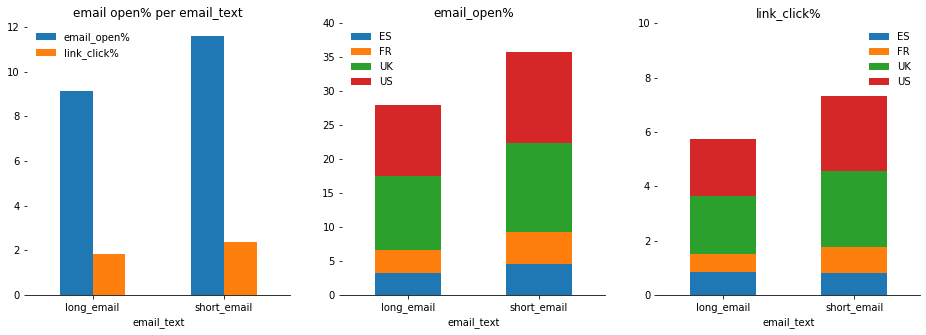

In [5]:
## CTR per feature per country

def ctr(by, kind, axn):
    df = data.groupby(by)[['email_id_c','email_open', 'link_click']].sum()    
    df['email_open%'] = df.email_open / df.email_id_c *100
    df['link_click%'] = df.link_click / df.email_id_c *100
    ax = df[['email_open%', 'link_click%']].plot(kind = kind
                                                   ,title = f'email open% per {by}'
                                                   ,rot = 0, sort_columns = True, ax = axn
                                                  )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    
    return ax

def ctr_country1(feature, by, axn, ylim):
    df = data.groupby([feature, 'user_country'])[['email_id_c','email_open', 'link_click']].sum()    
    df['email_open%'] = df.email_open / df.email_id_c *100
    df['link_click%'] = df.link_click / df.email_id_c *100
    ax = df[by].unstack().plot(kind = 'bar', stacked = True, title = f'{by}'
                               ,rot = 0, sort_columns = True, 
                               ax = axn, ylim = ylim)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    
    return ax


figure, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,5))
ctr('email_text', 'bar', ax1)

# CTR per email_text length
ctr_country1('email_text','email_open%', ax2, (0,40))
ctr_country1('email_text','link_click%', ax3, (0,10))



**Email text** 
* When email is shorter, **CTR for email** raised from **9.11% to 11.58%** and **CTR for link** in the email raised from **1.85% to 2.39%.** 
* We can find out from right graph that short email's CTR is generally higher than long email per each countries


### CTR per email_version, per country


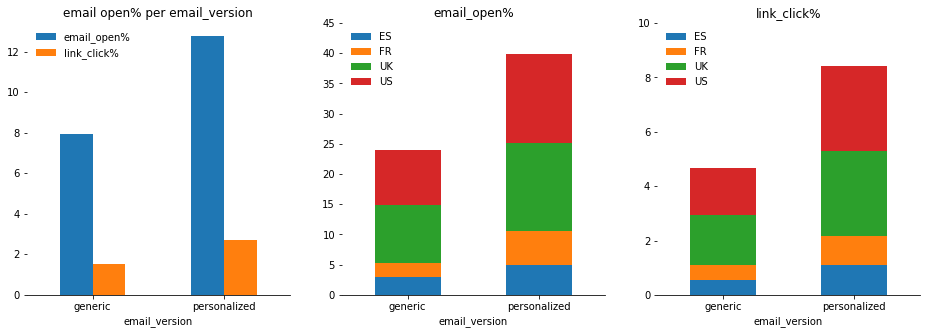

In [6]:
figure, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,5))

ctr('email_version', 'bar', ax1)
ctr_country1('email_version','email_open%', ax2, (0,45))
ctr_country1('email_version','link_click%', ax3, (0,10))

**Email version**
* When email is personalized, **CTR for email** raised from **7.93% to 12.77%**, and **CTR for link** raised from **1.51% to 2.72%**. 
* Could confirm from right graph that personalized email's CTR is generally higher than generic email per each countries

### CTR per (short & personalized) vs (long & personalized)

,personalized_long_email,personalized_short_email,baseline
user_country,,,
ES,1.082164,1.122244,0.832748
FR,0.797448,1.344743,0.800400
UK,2.640528,3.578609,2.467526
US,2.706477,3.601295,2.435981


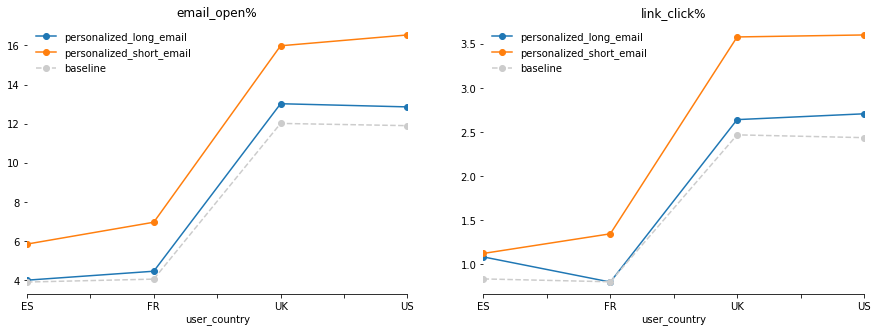

In [7]:
def sp(percent, axn):
    # Filtering personalized email only
    df = data[data.email_version == 'personalized']
    df = df.groupby(['user_country', 'email_text']).sum()
    
    # Personalized & separation per text Calculation 
    df['email_open%'] = df.email_open / df.email_id_c * 100
    df['link_click%'] = df.link_click / df.email_id_c * 100
    df = df[['email_open%', 'link_click%']]
    
    # BaseLine Calculation 
    df2 = data.groupby(['user_country']).sum()
    df2['email_open%'] = df2.email_open / df2.email_id_c * 100
    df2['link_click%'] = df2.link_click / df2.email_id_c * 100
    
    # plotting
    df = df[percent].unstack()
    df.columns = ['personalized_long_email', 'personalized_short_email']
    df.plot(kind = 'line', ax = axn, marker = 'o')
    df2[percent].plot(kind = 'line', ax = axn, color = '.8', linestyle = '--', marker = 'o', label = 'baseline')
    axn.set_title(f"{percent}")
    axn.spines['left'].set_visible(False)
    axn.spines['right'].set_visible(False)
    axn.spines['top'].set_visible(False)
    axn.legend(frameon = False)
    
    # table
    df['baseline'] = df2[percent]
    return df
    
    
figure, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
sp('email_open%', ax1)
sp('link_click%', ax2)


We can confirm Personalized Short email is most efficient compare to other long version emails

**Link CTR per each countries** 
(**base avg CTR** vs **personalized_short_email CTR** per country)
* **ES**: 0.83% vs 1.12%
* **FR**: 0.8% vs 1.34%
* **UK**: 2.46% vs 3.57%
* **US**: 2.43% vs 3.6%

### CTR per weekday, per country

(user_country        ES        FR        UK        US
 weekday                                             
 Monday        1.291638  1.214286  2.164804  2.677330
 Tuesday       1.497860  0.688231  2.447552  2.978168
 Wednesday     1.148600  0.891632  3.606557  3.074929
 Thursday      0.768693  0.929235  2.606212  2.914643
 Friday        0.437637  0.432588  2.157272  1.462844
 Saturday      0.270636  0.882553  2.042901  2.108052
 Sunday        0.422238  0.561404  2.309307  1.854198,
 <matplotlib.axes._subplots.AxesSubplot at 0x12592f050>)

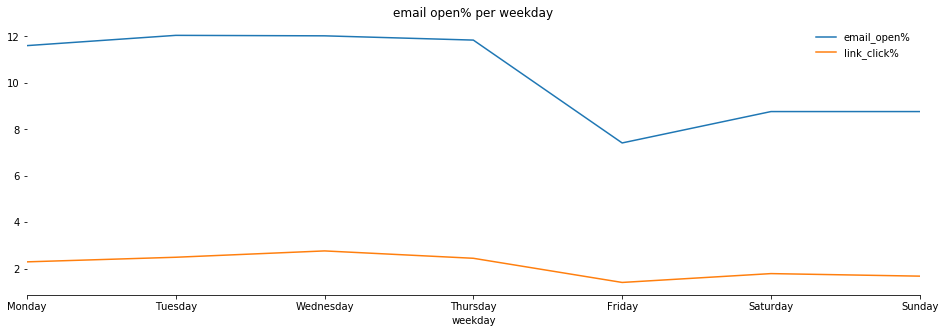

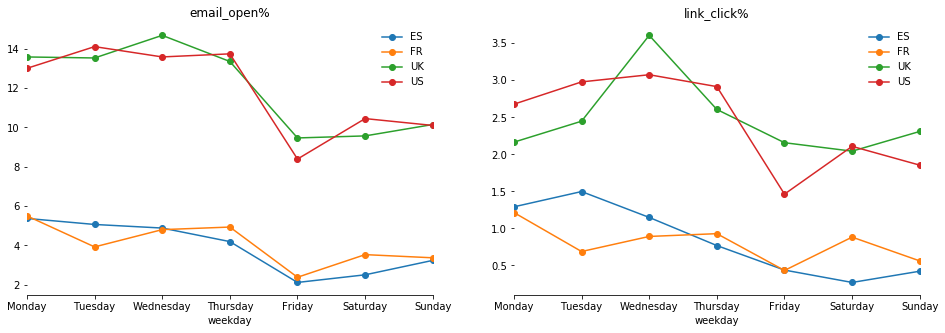

In [8]:
# Graph to show CTR per weekday

def ctr_dow(by, kind, axn):
    dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df = data.groupby(by)[['email_id_c','email_open', 'link_click']].sum()    
    df['email_open%'] = df.email_open / df.email_id_c *100
    df['link_click%'] = df.link_click / df.email_id_c *100
    ax = df.loc[dow, ['email_open%', 'link_click%']].plot(kind = kind
                                                   ,title = f'email open% per {by}'
                                                   ,rot = 0, sort_columns = True  , ax = axn
                                                  )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    
    return ax

def CTRpdow(by, axn):
    dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df = data.groupby(['weekday', 'user_country'])[['email_id_c', 'email_open', 'link_click']].sum()
    df['email_open%'] = df.email_open / df.email_id_c * 100
    df['link_click%'] = df.link_click / df.email_id_c * 100
    df = df[by].unstack().loc[dow]
    ax = df.plot(kind = 'line', rot = 0, ax = axn, title = by, marker = 'o')
        
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False)
    
    return df, ax

figure, ax1 = plt.subplots(figsize = (16,5))
ctr_dow('weekday', 'line', ax1)

figure, (ax2, ax3) = plt.subplots(1,2, figsize = (16,5))
CTRpdow('email_open%', ax2)
CTRpdow('link_click%', ax3)

**WeekDay** 
Click rate is higher during the **working day(from Mon to Thursday)**  and reducing from the Friday and weekend.

**Link CTR Per each countries,**
* **US**: Most highest (2.91-3.07%) during **Tuesday, Wednesday, Thursday**
* **UK**: Most highest (3.61%) on **Wednesday**
* **ES**: Most highest (1.50%) on **Tuesday**
* **FR**: Most highest (1.21%) on **Monday**


### CTR per hour

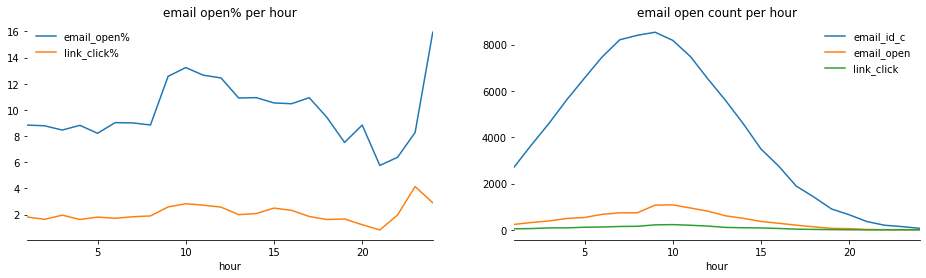

In [9]:
# Graph to show count per feature 

def chart_count(by, kind, axn):
    df = data.groupby(by)[['email_id_c','email_open', 'link_click']].sum()    
    ax = df.plot(kind = kind
                 ,title = f'email open count per {by}'
                 ,rot = 0, sort_columns = True, ax = axn
                )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    
    return ax


figure, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))
ctr('hour', 'line', ax1)
chart_count('hour', 'line', ax2)



**Hour**
* Could confirm that **email open rate** were **increased** during the **working hour** (after 0800) and **night time(after 2100)**
* However **amount of the viewer are low in the night time** following the graph in the right therefore excluded and take a deeper look in working hour only. 


### Finding optimized CTR  hours with chosen weekday


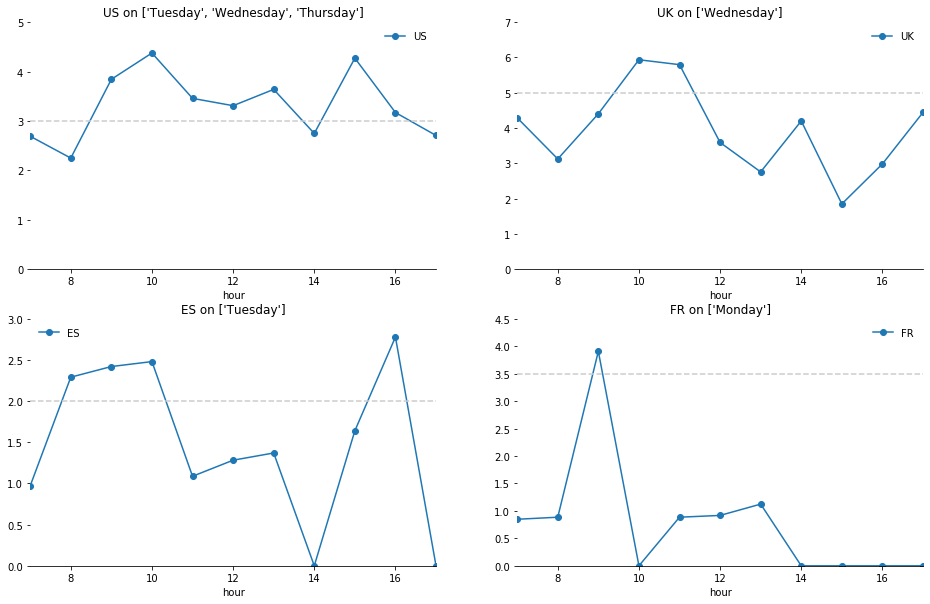

In [10]:

def CTRphour(day, country, axn, ylim, y):
    df = data[data.weekday.isin(day)].groupby(['hour', 'user_country'])[['email_id_c', 'email_open', 'link_click']].sum()
    df['link_click%'] = df.link_click / df.email_id_c * 100
    df = df['link_click%'].unstack()[country]
    ax = df.plot(kind = 'line', rot = 0, ax = axn, title = f"{country} on {day}", xlim = (7, 17), ylim = ylim, marker = 'o')
        
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axhline(y = y, linestyle = '--', color = '.8')
    ax.legend(frameon = False)
    
    return ax
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (16,10))

CTRphour(['Tuesday', 'Wednesday', 'Thursday'], 'US', ax1, (0,5), 3)
CTRphour(['Wednesday'], 'UK', ax2, (0,7), 5)
CTRphour(['Tuesday'], 'ES', ax3, (0,3), 2)
CTRphour(['Monday'], 'FR', ax4, (0,4.5), 3.5)


**Hour**
* Could confirm that **email open rate** were **increased** during the **working hour** (after 0800) and **night time(after 2100)**
* However **amount of the viewer are low in the night time** following the right graph therefore excluded night time and take a deeper look in working hour only. 
 
**Highest CTR hours per each countries**
* **US**: Most highest **Tuesday, Wednesday and Thursday 0900-1600** 
* **UK**: Most higest **on Wednesday 0800 - 1000** 
* **ES**: Most highest on **Tuesday 0800 - 1000**
* **FR**: Most highest on **Monday 0900**





### Finding optimized CTR hours with chosen weekday, short & personal email

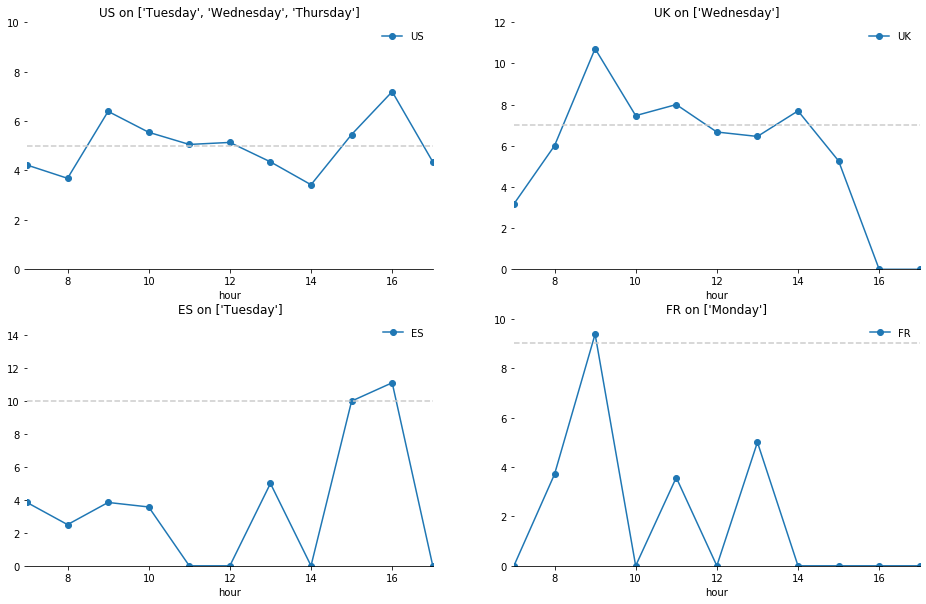

In [11]:
def CTRphour(day, country, axn, ylim, y):
    df = data[(data.email_text == 'short_email') & (data.email_version == 'personalized')]
    df = df[df.weekday.isin(day)].groupby(['hour', 'user_country'])[['email_id_c', 'email_open', 'link_click']].sum()
    df['link_click%'] = df.link_click / df.email_id_c * 100
    df = df['link_click%'].unstack()[country]
    ax = df.plot(kind = 'line', rot = 0, ax = axn, title = f"{country} on {day}", xlim = (7, 17), ylim = ylim, marker = 'o')
        
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axhline(y = y, linestyle = '--', color = '.8')
    ax.legend(frameon = False)
    
    return ax
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize = (16,10))

CTRphour(['Tuesday', 'Wednesday', 'Thursday'], 'US', ax1, (0,10), 5)
CTRphour(['Wednesday'], 'UK', ax2, (0,12), 7)
CTRphour(['Tuesday'], 'ES', ax3, (0,15), 10)
CTRphour(['Monday'], 'FR', ax4, (0,10), 9)


**Highest CTR hours per each countries**
* **US**: Tue, Wed, Thu & 0900 - 1200, 1500-1600
* **UK**: Wed & 0900 - 1100, 1400
* **ES**: Tue & 1500 - 1600
* **FR**: Mon & 0900

### CTR per feature - User_past_purchase

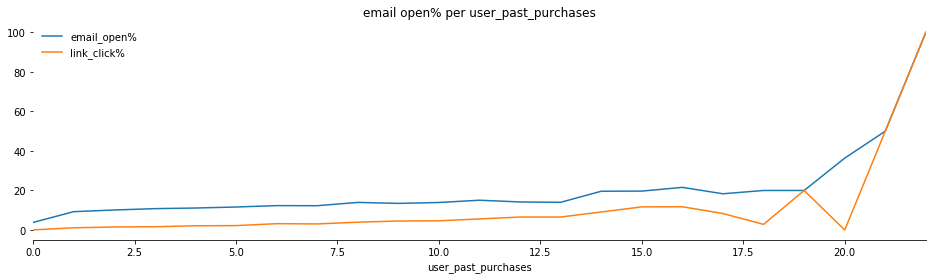

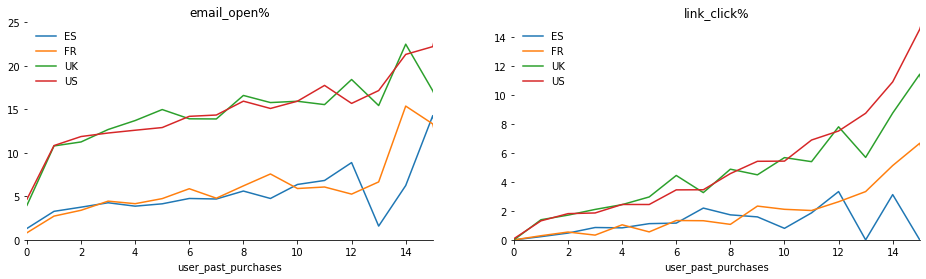

In [12]:
# Graph to show CTR per feature - email text and email version

def ctr_country2(feature, by, axn, ylim):
    df = data.groupby([feature, 'user_country'])[['email_id_c','email_open', 'link_click']].sum()    
    df['email_open%'] = df.email_open / df.email_id_c *100
    df['link_click%'] = df.link_click / df.email_id_c *100
    ax = df[by].unstack().plot(kind = 'line', title = f'{by}'
                               ,rot = 0, sort_columns = True,
                               ax = axn, xlim = (0, 15), ylim = ylim
                              )
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon = False)
    
    return ax

figure, ax1 = plt.subplots(figsize = (16,4))

ctr('user_past_purchases', 'line', ax1)

figure, (ax2, ax3) = plt.subplots(1,2, figsize = (16,4))
ctr_country2('user_past_purchases','email_open%', ax2, (0,25))
ctr_country2('user_past_purchases','link_click%', ax3, (0,15))

Based on this Graph, we can figure out that **CTR is becoming higher** when user had more **past experiences of purchases**.


## Conclusion

In [13]:
CTR = {'Country': ['ES', 'FR', 'UK', 'US'], 
       'Baseline':['0.83%', '0.80%' , '2.47%', '2.44%'],
       'Personalized & Short': ['1.12%', '1.34%', '3.57%', '3.60%'],
       'Optimized day&hour': ['over 2%', 'over 3.5%', 'over 5%', 'over 3%'],
       'Personalized & Short & Optimized day & hour': 
       ['over 10%', 'over 9%', 'over 7%', 'over 5%']
      }

Day = {'Country': ['ES', 'FR', 'UK', 'US'],
       'Day': ['Tue', 'Mon', 'Wed', 'Tue, Wed, Thu'],
       'hour': ['1500 - 1600', '0900', '0900 - 1100, 1400', '0900-1200, 1500-1600']
      }
    
# display(Markdown(f"#### {}".format('Basic Information'))) 
display(Markdown("#### {}".format('CTR Comparison')))  
display(pd.DataFrame(CTR))

display(Markdown("#### {}".format('Recommended day / hour')))  
display(pd.DataFrame(Day))

#### CTR Comparison

,Country,Baseline,Personalized & Short,Optimized day&hour,Personalized & Short & Optimized day & hour
0,ES,0.83%,1.12%,over 2%,over 10%
1,FR,0.80%,1.34%,over 3.5%,over 9%
2,UK,2.47%,3.57%,over 5%,over 7%
3,US,2.44%,3.60%,over 3%,over 5%


#### Recommended day / hour

,Country,Day,hour
0,ES,Tue,1500 - 1600
1,FR,Mon,0900
2,UK,Wed,"0900 - 1100, 1400"
3,US,"Tue, Wed, Thu","0900-1200, 1500-1600"


* Compared the CTR of baseline vs Optimized features to measure improvement
* Recommend to send personalized and short email in suggested time. 
* Better to set target on user who had past purchase experience.


## Reference

* [MarketingEmailCampaignAnalysis](https://github.com/JagaRamesh/ECommerceFunnelAnalysis/blob/master/Code/funnel.ipynb)